# Libraries used in the Code

In [634]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Loading file

In [635]:
data=pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Description

In [636]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Data information

In [637]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Checking and Deleting Duplicate rows

In [638]:
print(data.duplicated().sum())

data=data.drop_duplicates()

print("After\n",data.duplicated().sum())

52
After
 0


# Dropping useless columns 

In [639]:
data1=data.drop(columns=["capital-gain","capital-loss","education","fnlwgt"])
data1.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


# Unique Values in each column to find "?"

In [640]:
for i in data1.columns:
    print(data1[i].unique(),"\n")

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

['Male' 'Female'] 

[40 50 30 32 10 39 35 48 25 20 45 47  6 43 90 54 60 38 36 18 24 44 56

# Dropping rows with "?"

In [641]:
data1[['workclass', 'occupation', 'native-country']] = data1[['workclass', 'occupation', 'native-country']].replace('?', pd.NA)
data2 = data1.dropna(subset=['workclass', 'occupation', 'native-country'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   educational-num  45175 non-null  int64 
 3   marital-status   45175 non-null  object
 4   occupation       45175 non-null  object
 5   relationship     45175 non-null  object
 6   race             45175 non-null  object
 7   gender           45175 non-null  object
 8   hours-per-week   45175 non-null  int64 
 9   native-country   45175 non-null  object
 10  income           45175 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


# Class Distribution

In [642]:
data2.income.value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

# Encoding of categorical data

In [643]:
col2=["workclass","marital-status","occupation","relationship","race","gender","native-country"]
label_encoder = LabelEncoder()
data3=data2.copy()
for column in col2:
    data3[column] = label_encoder.fit_transform(data3[column])
data3.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,7,4,6,3,2,1,40,38,<=50K
1,38,2,9,2,4,0,4,1,50,38,<=50K
2,28,1,12,2,10,0,4,1,40,38,>50K
3,44,2,10,2,6,0,2,1,40,38,>50K
5,34,2,6,4,7,1,4,1,30,38,<=50K


# Standardization and Normalization of data & Removing Outliers

In [644]:
numerical_features = ["age", "hours-per-week"]
for feature in numerical_features:
    data3[feature] = (zscore(data3[feature])).round(2)
data3 = data3.loc[((data3['age'] >= -3) & (data3['age'] <= 3)) & ((data3['hours-per-week'] >= -3) & (data3['hours-per-week'] <= 3))]
data3.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-1.03,2,7,4,6,3,2,1,-0.08,38,<=50K
1,-0.04,2,9,2,4,0,4,1,0.75,38,<=50K
2,-0.80,1,12,2,10,0,4,1,-0.08,38,>50K
3,0.41,2,10,2,6,0,2,1,-0.08,38,>50K
5,-0.34,2,6,4,7,1,4,1,-0.91,38,<=50K


# Exploratory Data Analysis

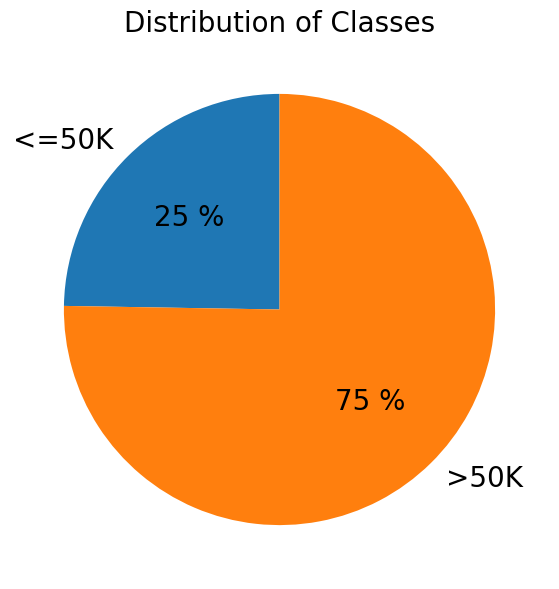

In [645]:
count_list = [(data3.income == '>50K').sum(), (data3.income == '<=50K').sum()]
label_list = list(data3['income'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.0f %%", startangle = 90, textprops = {'fontsize': 20})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

# Univariate Analysis

1.Visualizations for numerical variables

Histograms

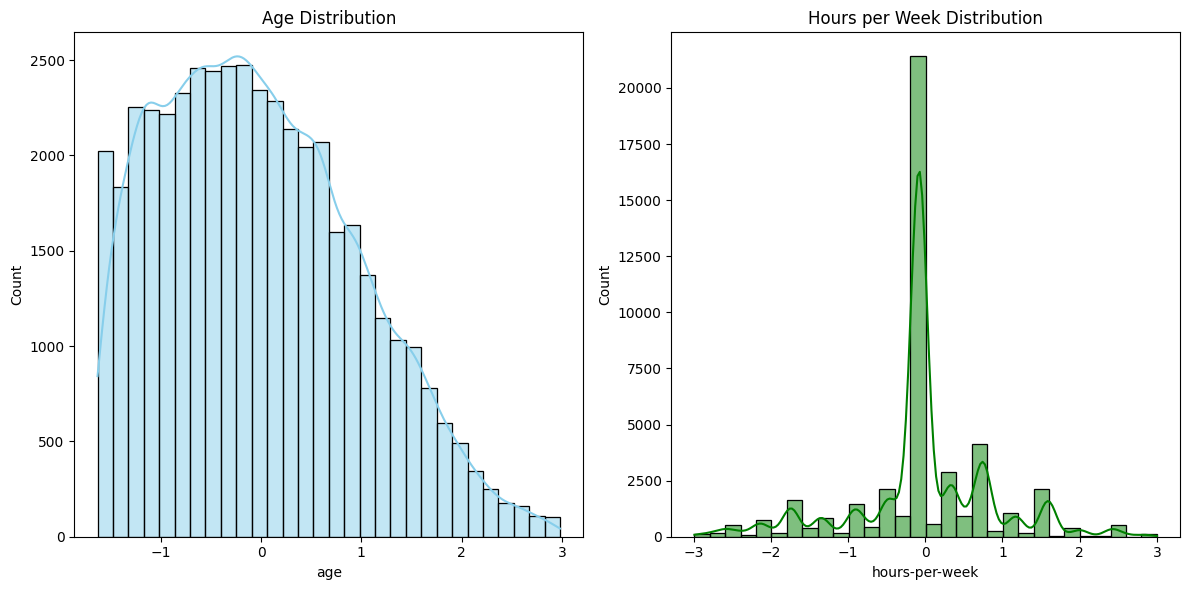

In [646]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data3['age'],bins=30,kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data3['hours-per-week'],kde=True, bins=30, color='green')
plt.title('Hours per Week Distribution')

plt.tight_layout()
plt.show()

Boxplot

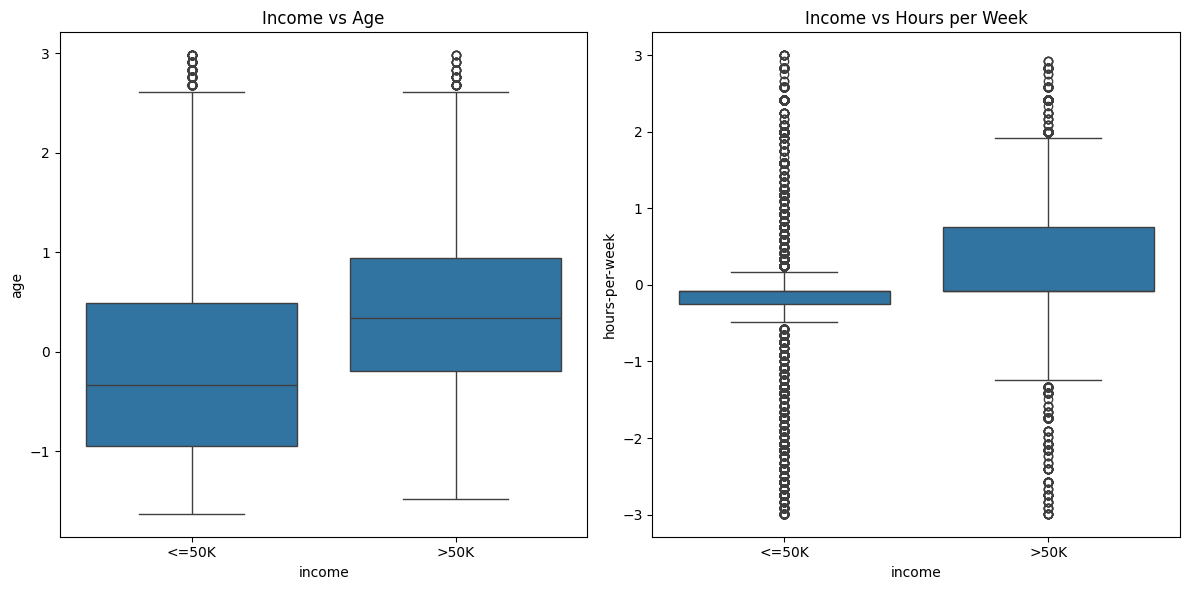

In [647]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='age', data=data3)
plt.title('Income vs Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='hours-per-week', data=data3)
plt.title('Income vs Hours per Week')

plt.tight_layout()
plt.show()

Bar plots for categorical variables

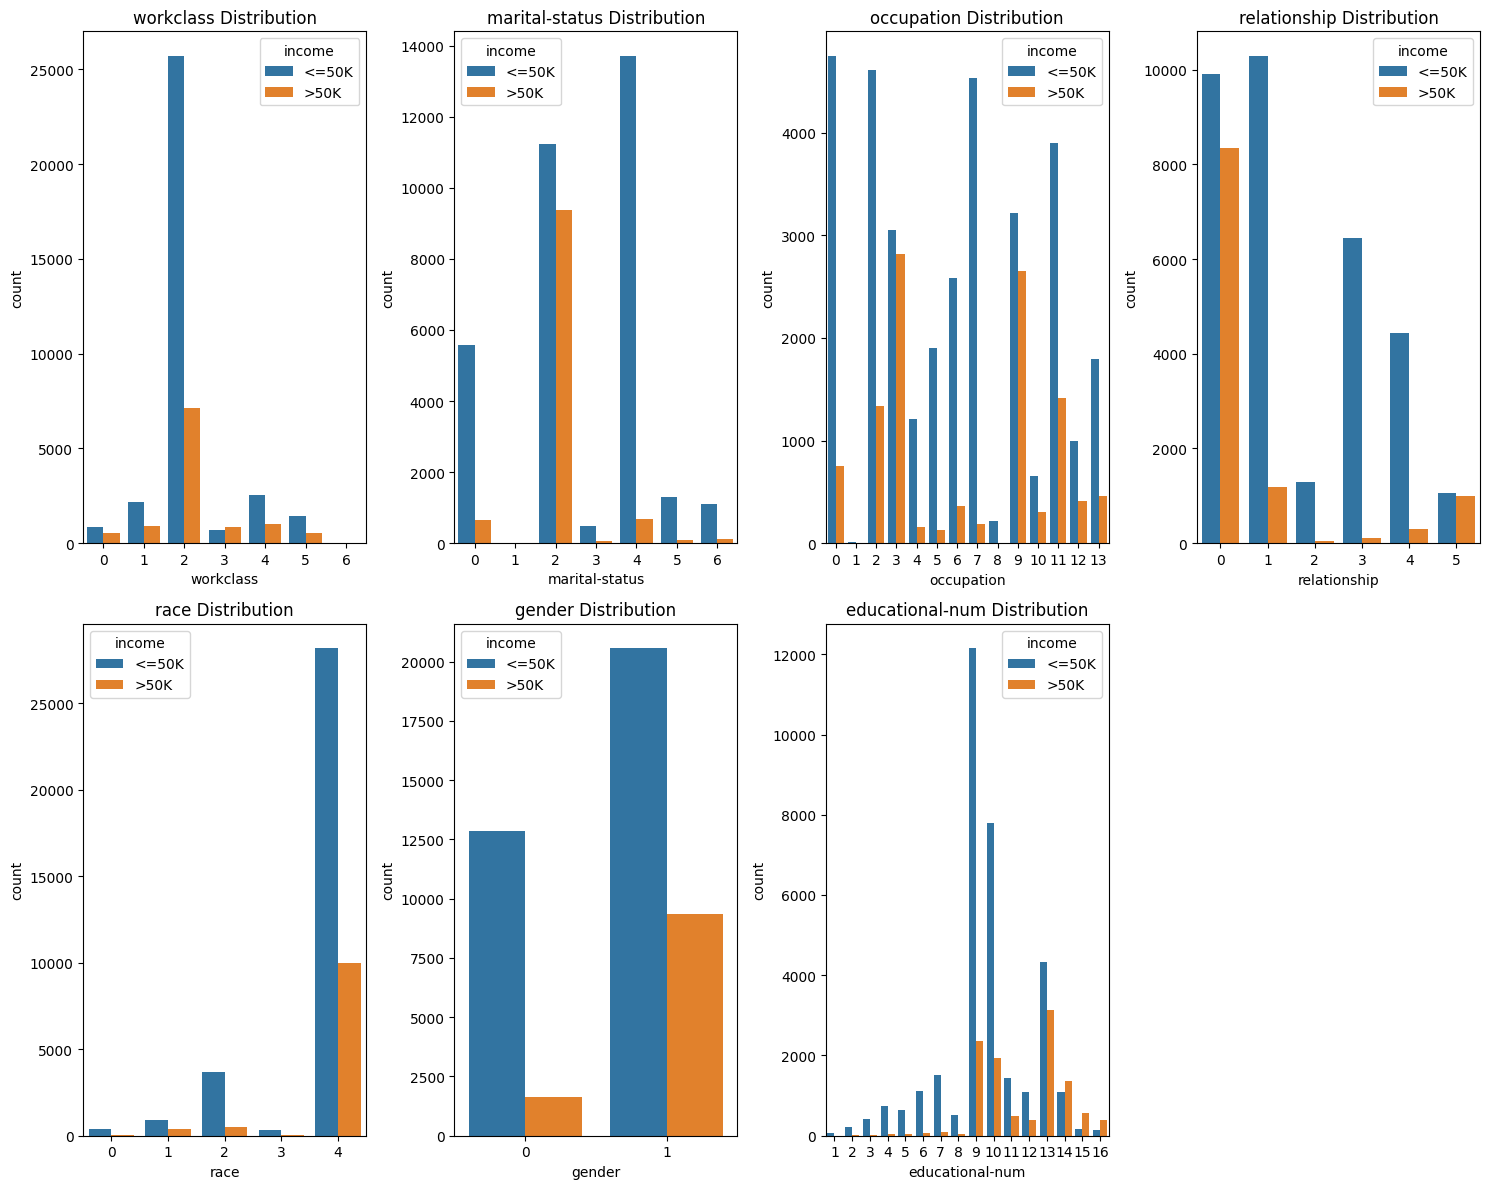

In [648]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender',"educational-num"]
plt.figure(figsize=(15, 12))
for i in range(len(categorical_cols)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=categorical_cols[i], hue='income',data=data3)
    plt.title(f'{categorical_cols[i]} Distribution')
plt.tight_layout()
plt.show()

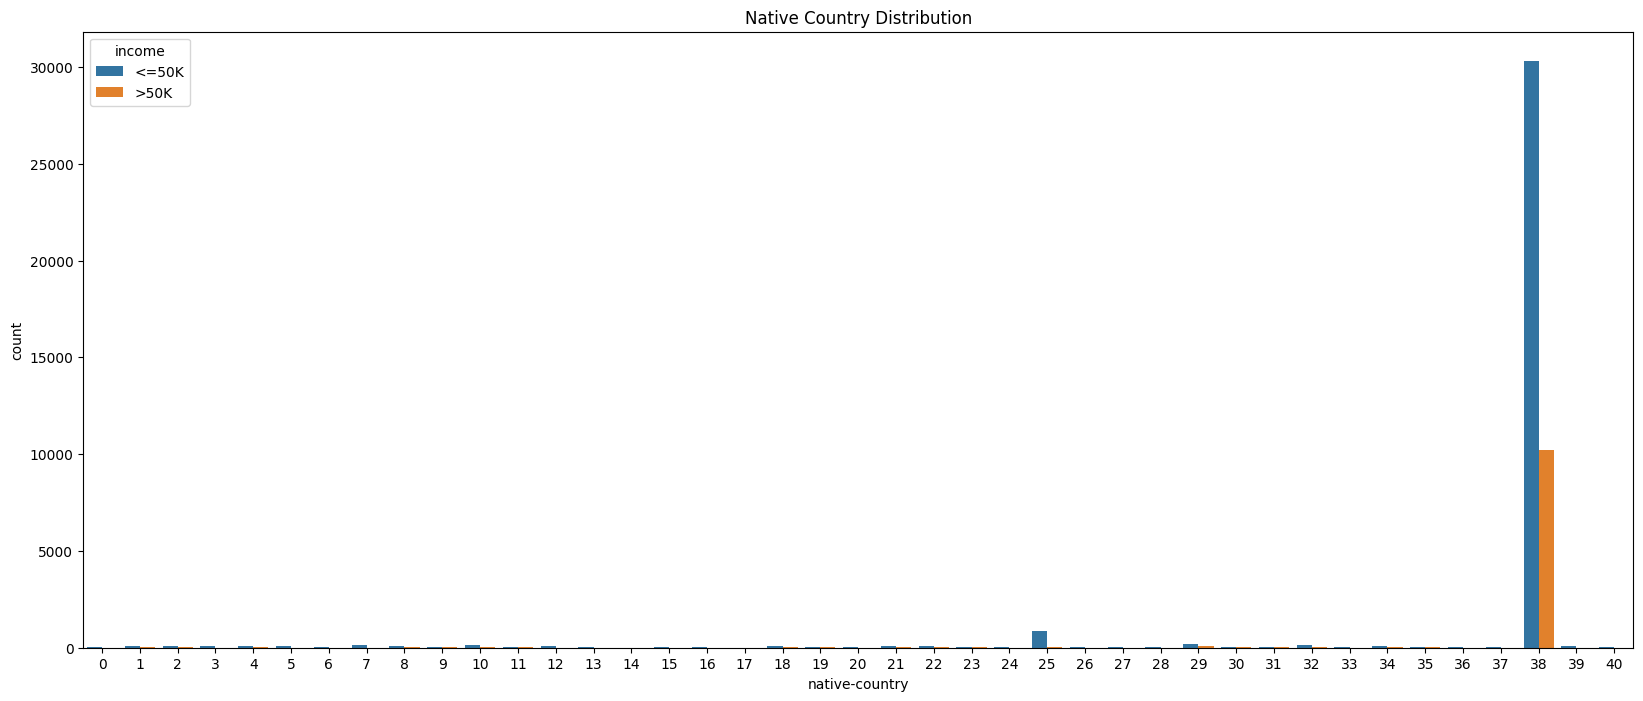

In [649]:
plt.figure(figsize=(20, 8))
sns.countplot(x='native-country',hue='income',data=data3)
plt.title('Native Country Distribution')
plt.show()

# Bivariate Analysis

Scatterplot of numerical

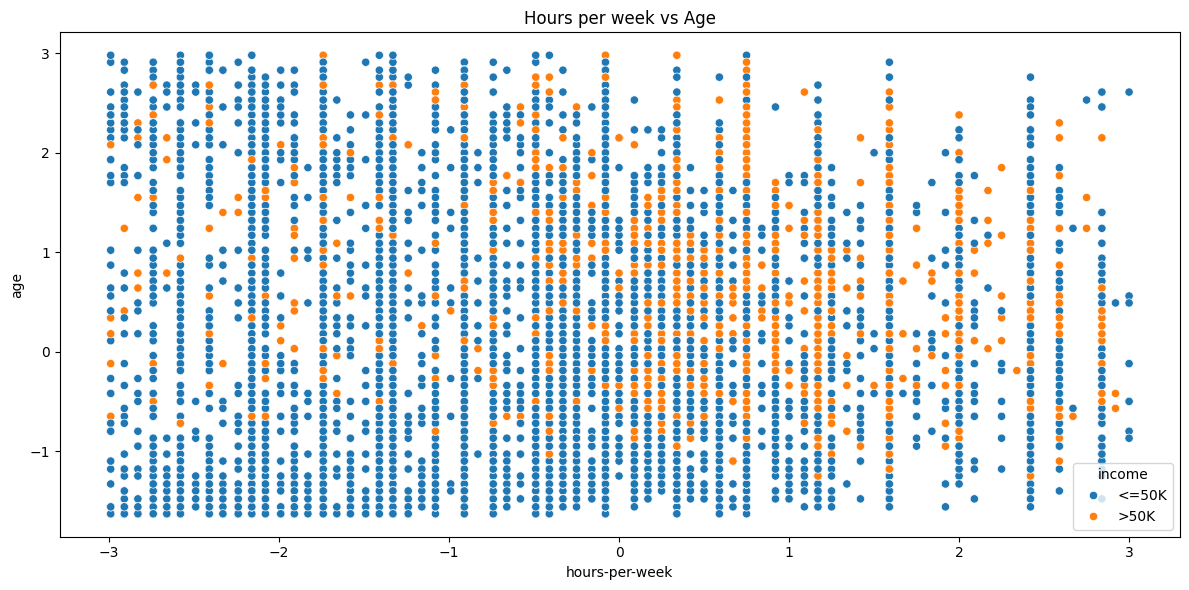

In [650]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hours-per-week', y='age', hue='income', data=data3)
plt.title('Hours per week vs Age')
plt.tight_layout()
plt.show()

Correlations

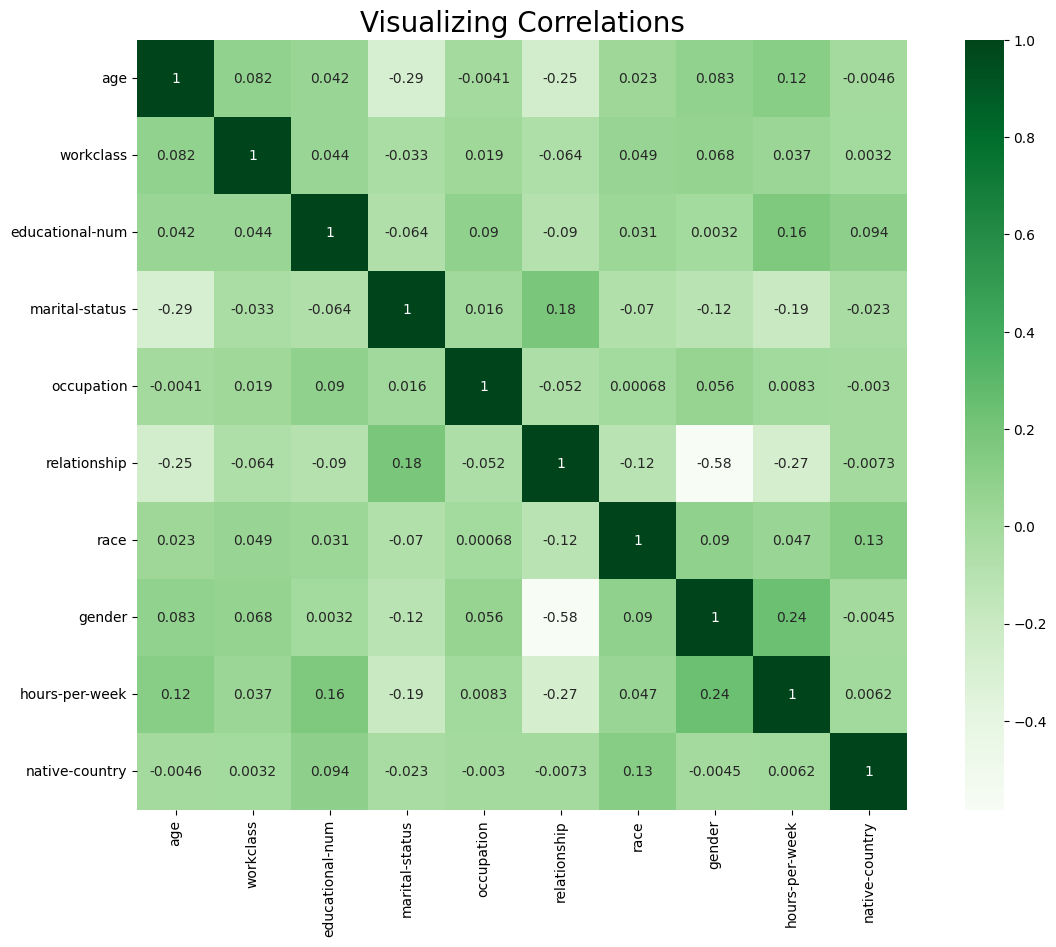

In [651]:
co=data3.columns.drop(["income"])
correlation_matrix = data3[co].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, cmap = 'Greens', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

# Descriptive Analysis

In [652]:
data3.describe().round(2)

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
count,44404.00,44404.00,44404.00,44404.00,44404.00,44404.00,44404.00,44404.00,44404.00,44404.00
mean,-0.02,2.20,10.12,2.58,5.96,1.42,3.68,0.67,-0.03,36.40
std,0.98,0.95,2.54,1.50,4.03,1.60,0.83,0.47,0.90,6.09
min,-1.63,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-2.99,0.00
25%,-0.80,2.00,9.00,2.00,2.00,0.00,4.00,0.00,-0.08,38.00
50%,-0.12,2.00,10.00,2.00,6.00,1.00,4.00,1.00,-0.08,38.00
75%,0.64,2.00,13.00,4.00,9.00,3.00,4.00,1.00,0.34,38.00
max,2.98,6.00,16.00,6.00,13.00,5.00,4.00,1.00,3.00,40.00


In [653]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44404 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44404 non-null  float64
 1   workclass        44404 non-null  int64  
 2   educational-num  44404 non-null  int64  
 3   marital-status   44404 non-null  int64  
 4   occupation       44404 non-null  int64  
 5   relationship     44404 non-null  int64  
 6   race             44404 non-null  int64  
 7   gender           44404 non-null  int64  
 8   hours-per-week   44404 non-null  float64
 9   native-country   44404 non-null  int64  
 10  income           44404 non-null  object 
dtypes: float64(2), int64(8), object(1)
memory usage: 4.1+ MB


# Class Balancing

In [654]:
smote=SMOTE(random_state=0)
x_trained=data3.drop("income",axis=1)
y_trained=data3["income"]
x_train_balanced,y_train_balanced=smote.fit_resample(x_trained,y_trained)
print("Original target class distribution:")
print(y_trained.value_counts())

print("Balanced target class distribution:")
print(y_train_balanced.value_counts())

data3=pd.concat([x_train_balanced,y_train_balanced],axis=1)

Original target class distribution:
income
<=50K    33421
>50K     10983
Name: count, dtype: int64
Balanced target class distribution:
income
<=50K    33421
>50K     33421
Name: count, dtype: int64


# Creating csv file

In [655]:
data3.to_csv("Income_prediction.csv")

# Collecting data for training and testing

In [656]:
x_train,x_test,y_train,y_test=train_test_split(x_train_balanced,y_train_balanced,random_state=0,test_size=0.3) 
data3=pd.concat([x_train,y_train],axis=1)
da=pd.concat([x_test,y_test],axis=1)

# Portions of Training & Testing Data

In [657]:
print("Training Data:\n",data3["income"].value_counts(),"\n\nTesting Data:\n",da["income"].value_counts())

Training Data:
 income
<=50K    23497
>50K     23292
Name: count, dtype: int64 

Testing Data:
 income
>50K     10129
<=50K     9924
Name: count, dtype: int64


# Feature Selection

                                                For Logistic Regression                                                                           

In [658]:
X = data3.drop(columns=["income"])
y = data3["income"]

log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=9)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Feature:", selected_features)


Selected Feature: Index(['age', 'workclass', 'educational-num', 'marital-status', 'relationship',
       'race', 'gender', 'hours-per-week', 'native-country'],
      dtype='object')


                                                         For Decision Tree                                                                           

In [659]:
tree = DecisionTreeClassifier()

rfe = RFE(estimator=tree, n_features_to_select=4)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Feature:", selected_features)

Selected Feature: Index(['age', 'educational-num', 'relationship', 'hours-per-week'], dtype='object')


                                                         For Random Forest                                                                        

In [660]:
rf = RandomForestClassifier()

rfe = RFE(estimator=rf, n_features_to_select=10)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'native-country'],
      dtype='object')


# Machine Learning Modeling and Evaluation 

                                                     Training                                                                                    

For Logistic Regression

In [661]:
X_train1 = data3[['age', 'workclass', 'educational-num', 'marital-status', 'relationship','race', 'gender', 'hours-per-week', 'native-country']]
y_train1 = y

X_test1 = da[['age', 'workclass', 'educational-num', 'marital-status', 'relationship','race', 'gender', 'hours-per-week', 'native-country']]
y_test1 = da["income"]

log_reg.fit(X_train1, y_train1)

y_train_pred1 = log_reg.predict(X_train1)
y_test_pred1 = log_reg.predict(X_test1)
y_test_pred_proba1 = log_reg.predict_proba(X_test1)[:, 1]

For Decision Tree

In [662]:
X_train2=data3[['age', 'educational-num', 'relationship', 'hours-per-week']]
y_train2=y

X_test2= da[['age', 'educational-num', 'relationship', 'hours-per-week']]
y_test2 = da["income"]

tree.fit(X_train2, y_train2)


y_train_pred2 = tree.predict(X_train2)
y_test_pred2 = tree.predict(X_test2)
y_test_pred_proba2 = tree.predict_proba(X_test2)[:, 1]

For Random Forest

In [663]:
X_train3=data3[['age', 'workclass', 'educational-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week', 'native-country']]
y_train3=y

X_test3= da[['age', 'workclass', 'educational-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'hours-per-week', 'native-country']]
y_test3 = da["income"]
rf.fit(X_train3, y_train3)

y_train_pred3 = rf.predict(X_train3)
y_test_pred3 = rf.predict(X_test3)
y_test_pred_proba3 = rf.predict_proba(X_test3)[:, 1]

# Evaluation

                                                 Training & Testing Error                                                                         

For Logistic Regression

In [ ]:
train_error1 = round(1 - accuracy_score(y_train1, y_train_pred1),3)
test_error1 = round(1 - accuracy_score(y_test1, y_test_pred1),3)

print(f"Training Error (Loss): {train_error1*100}%")
print(f"Testing Error (Loss): {(test_error1*100)}%")

Training Error (Loss): 25.7%
Testing Error (Loss): 25.58719393606942%


For Decision Tree

In [ ]:
train_error2 = round(1 - accuracy_score(y_train2, y_train_pred2),3)
test_error2 = round(1 - accuracy_score(y_test2, y_test_pred2),3)

print(f"Training Error (MSE): {(train_error2*100)}%")
print(f"Testing Error (MSE): {(test_error2*100)}%")

Training Error (MSE): 8.722135544679311%
Testing Error (MSE): 16.8%


For Random Forest

In [666]:
train_error3 = round(1 - accuracy_score(y_train3, y_train_pred3),3)
test_error3 = round(1 - accuracy_score(y_test3, y_test_pred3),3)

print(f"Training Error (MSE): {(train_error3*100)}%")
print(f"Testing Error (MSE): {(test_error3*100)}%")

Training Error (MSE): 2.7%
Testing Error (MSE): 14.399999999999999%


                                                    Accuracy                                                                                        

For Logistic Regression

In [681]:
accuracy11=accuracy_score(y_train1, y_train_pred1)
accuracy21=accuracy_score(y_test1, y_test_pred1)
print(f"Training Accuracy: {(accuracy11*100)}%\n")
print(f"Testing Accuracy: {(accuracy21*100)}%\n")

Training Accuracy: 74.33798542392442%

Testing Accuracy: 74.41280606393057%



For Decision Tree

In [680]:
accuracy12=accuracy_score(y_train2, y_train_pred2)
accuracy22=accuracy_score(y_test2, y_test_pred2)
print(f"Training Accuracy: {(accuracy12*100)}%\n")
print(f"Testing Accuracy: {(accuracy22*100)}%\n")

Training Accuracy: 91.2778644553207%

Testing Accuracy: 83.22944197875628%



For Random Forest

In [679]:
accuracy13=accuracy_score(y_train3, y_train_pred3)
accuracy23=accuracy_score(y_test3, y_test_pred3)
print(f"Training Accuracy: {(accuracy13*100)}%\n")
print(f"Testing Accuracy: {(accuracy23*100)}%\n")

Training Accuracy: 97.27072602534784%

Testing Accuracy: 85.55328379793548%



                                               Confusion Matrix                                                                                   

For Logistic Regression

In [670]:
conf_matrix1 = confusion_matrix(y_test1, y_test_pred1)
print("Confusion Matrix:\n", conf_matrix1)

Confusion Matrix:
 [[7260 2664]
 [2467 7662]]


For Decision Tree


In [671]:
conf_matrix2 = confusion_matrix(y_test2, y_test_pred2)
print("Confusion Matrix:\n", conf_matrix2)

Confusion Matrix:
 [[8454 1470]
 [1893 8236]]


For Random Forest

In [672]:
conf_matrix3 = confusion_matrix(y_test3, y_test_pred3)
print("Confusion Matrix:\n", conf_matrix3)

Confusion Matrix:
 [[8356 1568]
 [1329 8800]]


                                                  Classification Report                                                                           

For Logistic Regression

In [673]:
print("Classification Report:\n", classification_report(y_test1, y_test_pred1))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.75      0.73      0.74      9924
        >50K       0.74      0.76      0.75     10129

    accuracy                           0.74     20053
   macro avg       0.74      0.74      0.74     20053
weighted avg       0.74      0.74      0.74     20053



For Decision Tree

In [674]:
print("Classification Report:\n", classification_report(y_test2, y_test_pred2))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.85      0.83      9924
        >50K       0.85      0.81      0.83     10129

    accuracy                           0.83     20053
   macro avg       0.83      0.83      0.83     20053
weighted avg       0.83      0.83      0.83     20053



For Random Forest

In [675]:
print("Classification Report:\n", classification_report(y_test3, y_test_pred3))

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.84      0.85      9924
        >50K       0.85      0.87      0.86     10129

    accuracy                           0.86     20053
   macro avg       0.86      0.86      0.86     20053
weighted avg       0.86      0.86      0.86     20053



                                                             AUC                                                                                   

For Logistic Regression

In [676]:
roc_auc1 = roc_auc_score(y_test1, y_test_pred_proba1)
print(f"AUC Score: {roc_auc1:.2f}")

AUC Score: 0.82


For Decision Tree

In [677]:
roc_auc2 = roc_auc_score(y_test2, y_test_pred_proba2)
print(f"AUC Score: {roc_auc2:.2f}")

AUC Score: 0.88


For Random Forest

In [678]:
roc_auc3 = roc_auc_score(y_test3, y_test_pred_proba3)
print(f"AUC Score: {roc_auc3:.2f}")

AUC Score: 0.93
